In [1]:
import os, sys, re
import numpy as np
import pandas as pd
import platform
from IPython.display import display, clear_output, HTML
from datetime import datetime
import pickle

from time import sleep
from tqdm.auto import tqdm

import selenium
from selenium.webdriver.common.by import By
from selenium.webdriver import Firefox, ActionChains

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

START_DT = datetime.now()

In [2]:
SITE_ROOT = 'https://jdi-testing.github.io/jdi-light/'
DRIVER_FILE = 'geckodriver.exe'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False


In [3]:
options = selenium.webdriver.FirefoxOptions()
options.headless = HEADLESS

In [4]:
driver = Firefox(executable_path = os.path.join(os.getcwd(),'geckodriver.exe'), options=options)
driver.get(SITE_ROOT)

In [5]:
driver.get_window_size()

{'width': 1366, 'height': 768}

In [6]:
driver.find_element_by_id("user-icon").click()
driver.find_element_by_id("name").send_keys(LOGIN)
driver.find_element_by_id("password").send_keys(PASSWORD)
driver.find_element_by_id("login-button").click()
sleep(WAIT_TIME_SECONDS)


In [7]:
driver.get_window_size()

{'width': 1366, 'height': 768}

In [8]:
driver.find_element_by_link_text("Elements packs").click()
driver.find_element_by_link_text("Angular").click()
sleep(15.0)
driver.get_window_size(), driver.get_window_rect()

({'width': 1366, 'height': 768},
 {'x': 4, 'y': 4, 'width': 1366, 'height': 768})

In [9]:
def maximize_window(driver=None):
    S = lambda X: driver.execute_script('return document.body.parentNode.scroll' + X )
    driver.set_window_size(S('Width'), S('Height'))
    sleep(15.0)
    driver.find_element_by_tag_name('body')
    print('Window maximized')



maximize_window(driver=driver)
driver.get_window_size(), driver.get_window_rect()

Window maximized


({'width': 1349, 'height': 16384},
 {'x': 4, 'y': 4, 'width': 1349, 'height': 16384})

In [10]:
driver.set_window_size(1349, 16384*2) 

In [11]:
driver.save_screenshot('dataset/images/angular-3.png')

True

In [12]:
img = plt.imread('dataset/images/angular-3.png')
img.shape

(16310, 1349, 4)

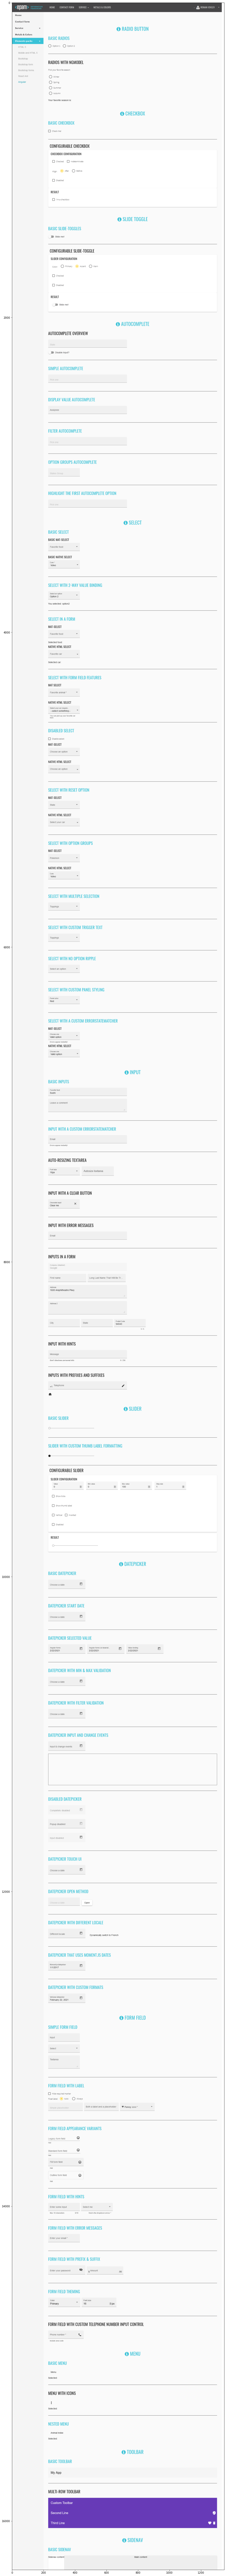

In [13]:
IMG_SIZE = 15
h = img.shape[0]/img.shape[1]*IMG_SIZE
w = IMG_SIZE

plt.figure(figsize=(w,h))
plt.imshow(img)

In [14]:
e = driver.find_element_by_xpath('//html')

In [15]:
e.rect

{'x': 0.0, 'y': 0.0, 'width': 1332.0, 'height': 16310.0}

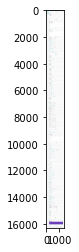

In [16]:
plt.imshow(img)

In [17]:
print('Elapsed time:', datetime.now() - START_DT)

Elapsed time: 0:00:52.827499


In [18]:
driver.close()